<a href="https://colab.research.google.com/github/EdinK48/Resnet50_Leukocyte_Classification/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from os.path import isfile, join
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import random

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/blood_cell_images.zip

--2023-09-05 18:37:07--  https://lazyprogrammer.me/course_files/blood_cell_images.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109834540 (105M) [application/zip]
Saving to: ‘blood_cell_images.zip’

blood_cell_images.z 100%[===================>] 104.75M  14.0MB/s    in 11s     

2023-09-05 18:37:19 (9.72 MB/s) - ‘blood_cell_images.zip’ saved [109834540/109834540]



In [ ]:
!unzip -nq blood_cell_images.zip

## Prepare folder and files for retrievel - Training

In [ ]:
training_path = "/content/blood_cell_images/TRAIN"
os.chdir(training_path)
train_sub_folders = []

all_subdirs = [d for d in os.listdir('.') if os.path.isdir(d)]
for dirs in all_subdirs:
    dir = os.path.join(training_path, dirs)
    os.chdir(dir)
    current = os.getcwd()
    train_sub_folders.append(current)


train_files_path = []
y_train = []
for folder in train_sub_folders:
  onlyfiles = [folder + "/" + f for f in os.listdir(folder) if isfile(join(folder, f))]
  folder_name = folder.split("/")[-1]
  for i in range(0, len(onlyfiles)):
    y_train.append(folder_name)
  train_files_path.extend(onlyfiles)

## Prepare folder and files for retrieval - Test

In [ ]:
test_path = "/content/blood_cell_images/TEST"
os.chdir(test_path)
test_sub_folders = []
all_subdirs = [d for d in os.listdir('.') if os.path.isdir(d)]

for dirs in all_subdirs:
    dir = os.path.join(test_path, dirs)
    os.chdir(dir)
    current = os.getcwd()
    test_sub_folders.append(current)

test_files_path = []
y_test = []
for folder in test_sub_folders:
  onlyfiles = [folder + "/" + f for f in os.listdir(folder) if isfile(join(folder, f))]
  folder_name = folder.split("/")[-1]
  for i in range(0, len(onlyfiles)):
    y_test.append(folder_name)
  test_files_path.extend(onlyfiles)

In [ ]:
"""
import glob
#print(glob.glob(train_sub_folders[0] + "/*"))
test = glob.glob(train_sub_folders[0] + "/*")
matching = [s for s in test if "_0_1106" in s]
matching
"""

'\nimport glob\n#print(glob.glob(train_sub_folders[0] + "/*"))\ntest = glob.glob(train_sub_folders[0] + "/*")\nmatching = [s for s in test if "_0_1106" in s]\nmatching\n'

In [ ]:
y_train_labels = []
y_test_labels = []

## Read training data

In [ ]:
training_set = np.zeros(shape=(1,240,320, 3)).astype(np.uint8)
container = np.zeros(shape=(1,240,320,3)).astype(np.uint8)
end = len(train_files_path)
train_data = []
for i in range(end):
  if i == 0:
    # cv2.imread(train_files_path[i], cv2.IMREAD_COLOR,).astype(np.float32)
    train_data.append(cv2.cvtColor(cv2.imread(train_files_path[i]), cv2.COLOR_BGR2RGB).astype(np.uint8))
    y_train_labels.append(y_train[i])
    train_files_path.remove(train_files_path[i])
    y_train.remove(y_train[i])
  else:
    index = random.randint(0, len(train_files_path)-1)
    train_data.append(cv2.cvtColor(cv2.imread(train_files_path[index]), cv2.COLOR_BGR2RGB).astype(np.uint8))
    y_train_labels.append(y_train[index])
    train_files_path.remove(train_files_path[index])
    y_train.remove(y_train[index])

## Read test data

In [ ]:
test_data = []
end = len(test_files_path)
for i in range(end):
  if i == 0:
    test_data.append(cv2.cvtColor(cv2.imread(test_files_path[i]), cv2.COLOR_BGR2RGB).astype(np.uint8))
    y_test_labels.append(y_test[i])
    test_files_path.remove(test_files_path[i])
    y_test.remove(y_test[i])
  else:
    index = random.randint(0, len(test_files_path)-1)
    test_data.append(cv2.cvtColor(cv2.imread(test_files_path[index]), cv2.COLOR_BGR2RGB).astype(np.uint8))
    y_test_labels.append(y_test[index])
    test_files_path.remove(test_files_path[index])
    y_test.remove(y_test[index])

In [ ]:
train_data = np.asarray(train_data, dtype=np.float16)
test_data = np.asarray(test_data, dtype=np.float16)

In [ ]:
print(train_data.shape, test_data.shape)

(9957, 240, 320, 3) (2487, 240, 320, 3)


In [ ]:
print(len(y_train_labels), len(y_test_labels))

9957 2487


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_train_labels = le.fit_transform(y_train_labels)
y_test_labels = le.transform(y_test_labels)

In [ ]:
y_train_labels = np.asarray(y_train_labels, dtype=np.float16)
y_test_labels = np.asarray(y_test_labels, dtype=np.float16)

In [ ]:
y_train_labels.shape

(9957,)

In [ ]:
np.unique(y_test_labels)

array([0., 1., 2., 3.], dtype=float16)

In [ ]:
train_data_scaled = (train_data / 127.5) - 1
test_data_scaled = (test_data / 127.5) -1

In [26]:
def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    #X = tf.math.add()([X, X_shortcut])# SKIP Connection
    X = tf.math.add(X, X_shortcut)
    X = tf.keras.layers.Activation('relu')(X)

    return X

In [27]:
def convolutional_block(X, f, filters, stage, block, s=2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # X = tf.math.add()([X, X_shortcut])
    X = tf.math.add(X, X_shortcut)
    X = tf.keras.layers.Activation('relu')(X)

    return X

In [ ]:
train_data.shape[1:]

(240, 320, 3)

In [28]:
# input_shape=(224, 224, 3)
def ResNet50(input_shape):

    X_input = tf.keras.layers.Input(input_shape)

    X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis=3, name='bn_conv1')(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    # ---- New stuff --- #
    #X = Flatten()(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(256, activation='relu', name='fc1',kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    x = tf.keras.layers.Dense(128, activation='relu', name='fc2',kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.Dense(4, activation='softmax', name='fc3',kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0))(X)
    # ---- New stuff --- #
    model = tf.keras.Model(inputs=X_input, outputs=X, name='ResNet50')


    return model

model = ResNet50(input_shape=train_data.shape[1:])

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

history = model.fit(x=tf.convert_to_tensor(train_data_scaled), y=tf.convert_to_tensor(y_train_labels),
                    validation_data=(tf.convert_to_tensor(test_data_scaled), tf.convert_to_tensor(y_test_labels)),
                    epochs=100, verbose=1)

Epoch 1/100
312/312 [==============================] - 135s 373ms/step - loss: 6.5459 - accuracy: 0.2671 - val_loss: 2.9094 - val_accuracy: 0.2304
Epoch 2/100
312/312 [==============================] - 115s 368ms/step - loss: 1.7421 - accuracy: 0.3841 - val_loss: 1.8377 - val_accuracy: 0.3522
Epoch 3/100
312/312 [==============================] - 115s 368ms/step - loss: 1.2765 - accuracy: 0.4644 - val_loss: 1.2648 - val_accuracy: 0.4439
Epoch 4/100
312/312 [==============================] - 115s 368ms/step - loss: 1.0076 - accuracy: 0.5530 - val_loss: 2.3541 - val_accuracy: 0.3261
Epoch 5/100
312/312 [==============================] - 115s 368ms/step - loss: 0.9550 - accuracy: 0.5790 - val_loss: 1.9416 - val_accuracy: 0.4077
Epoch 6/100
312/312 [==============================] - 115s 368ms/step - loss: 0.7624 - accuracy: 0.6630 - val_loss: 1.1617 - val_accuracy: 0.5239
Epoch 7/100
312/312 [==============================] - 115s 368ms/step - loss: 0.6087 - accuracy: 0.7330 - val_loss: 1

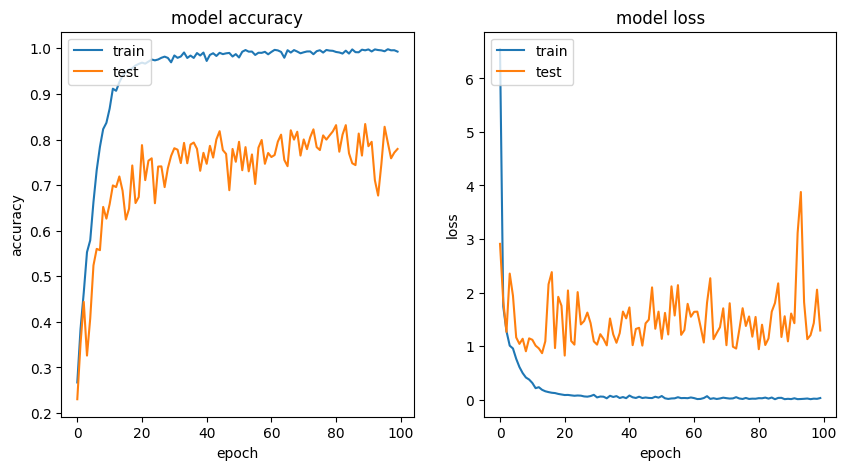

In [34]:
# Display the accuracy and loss for each epoch
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].title.set_text('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', "test"], loc='upper left')


ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].title.set_text('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', "test"], loc='upper left')